<a href="https://colab.research.google.com/github/Arash444/Foundation-of-Machine-Learning/blob/main/Fall2025_HW4_Two_Layer_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS224-EE242a - Fall 2025 - Homework 4

# Due: Friday, October 31, 2025 @ 11:59pm

### Maximum points: 50 pts


## Submit your solution to Gradescope:
1. Submit a single PDF to **HW4**
2. Submit your jupyter notebook to **HW4-code**

**Notice:**
In Markdown, when you write in LaTeX math mode, do not leave any leading and trailing whitespaces inside the dollar signs ($). For example, write `(dollarSign)\mathbf(dollarSign)(dollarSign)` instead of `(dollarSign)(space)\mathbf{w}(dollarSign)`. Otherwise, nbconvert will throw an error and the generated pdf will be incomplete. [This is a bug of nbconvert.](https://tex.stackexchange.com/questions/367176/jupyter-notebook-latex-conversion-fails-escaped-and-other-symbols)

**See the additional submission instructions at the end of this notebook**


## <font color='green'> Enter your information below: </font>

### <font color='green'> Your Name (submitter): </font> Arash Shahin

### <font color='green'> Your student ID (submitter): </font> 862622048
    
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>


## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


# Overview
In this assignment you will implement a two-layer neural network. You will implement the loss functions, gradients, optimizers to train the network and test its performance on MNIST dataset.

For this assignment we will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/).

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask.

Before you start, make sure you have installed all those packages in your local Jupyter instance

## Read *all* cells carefully and answer all parts (both text and missing code)

You will complete all the code marked `TODO` and answer descriptive/derivation questions



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# make sure you import here everything else you may need

## Load MNIST Dataset

For this assignment, we will use [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits data set. The dataset consists 10 handwritten digits (0,1,...,9). It is a widely used dataset to demonstrate simple image classification problem.

MNIST dataset is publicly available from different sources. We will be using MNIST from Keras package. If you do not have Keras installed, you can find the installation guide [here](https://www.tutorialspoint.com/keras/keras_installation.htm).

In short, you need to run ```conda install -c anaconda keras``` or ```pip install keras```

The training data consists of 60000 images of size $28 \times 28$ pixels; the test data consists of 10000 images.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


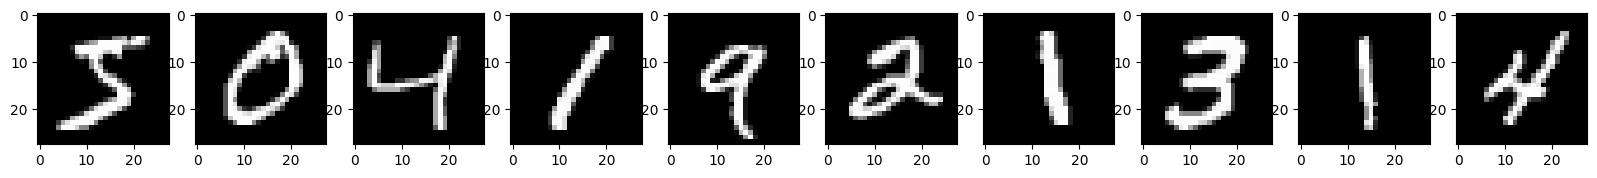

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training data shape:',x_train.shape)
print('Test data shape:',x_test.shape)

n_img=10
plt.figure(figsize=(n_img*2,2))
plt.gray()
for i in range(n_img):
    plt.subplot(1,n_img,i+1)
    plt.imshow(x_train[i])
plt.show()

We will be vectorizing the training and test images. So, the size of each vector will be 784.

In [ ]:
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

print('Training data shape after reshaping:',x_train.shape)
print('Test data shape after reshaping::',x_test.shape)
print("\n")
print('Training label shape: ', y_train.shape)
print('Test label shape: ', y_test.shape)

Training data shape after reshaping: (60000, 784)
Test data shape after reshaping:: (10000, 784)


Training label shape:  (60000,)
Test label shape:  (10000,)


## Question 1: Binary classification using neural network [50 pts]

We will start with classification of images for two different digits using a two-layer network with a cross entropy loss.

Pick any two digits out of ten for our classification (say 5 and 8), which we will assign label "0" or "1".

Pick same number of images from each class for training and create arrays for input and output (say 1000).

```
# train_x -- N x 784 array of training input
# train_y -- N x 1 array of binary labels
```  

If you use 1000 images from each class N = 2000. You can increase the number of training samples if you like. It is just a suggestion.


We also need to transpose the dimension of the data so that their size becomes $784\times N$. It will be helpful to feed it to our model based on our notations.


In [ ]:
def extract_binary_classification_dataset(x, y, label1, label2, num_samples):
    """Make a subset dataset from MNIST, containing only 2 classes for binary classification task
    Args:
        x (numpy.ndarray): data, can be x_train or x_test
        y (numpy.ndarray): labels of data, can be y_train or y_test
        label1 (int): the first class you pick, e.g. 5
        label2 (int): the second class you pick, e.g. 8
        num_samples (int): the number of images you select for each class, e.g. 1000
    Returns:
        x_ (numpy.ndarray): the data for 2 picked classes
        y_ (numpy.ndarray): the corresponding labels for 2 picked classes
    """
    # for class 1
    x1 = x[y == label1]
    x1 = x1[:num_samples]
    y1 = np.zeros(len(x1))

    # for class 2
    x2 = x[y == label2]
    x2 = x2[:num_samples]
    y2 = np.ones(len(x2))

    # combine 2 classes
    x_ = np.concatenate((x1,x2),axis=0)
    y_ = np.concatenate((y1,y2),axis=0)
    return x_, y_


# Pick your own digits
label1 = 5
label2 = 8
num_samples = 1000

# Train & test data
train_x, train_y = extract_binary_classification_dataset(x_train, y_train, label1, label2, num_samples)
test_x, test_y = extract_binary_classification_dataset(x_test, y_test, label1, label2, num_samples)

# reshape data
train_x = train_x.T
test_x = test_x.T
print("Training data shape:", train_x.shape)
print("Test data shape:", test_x.shape)

Training data shape: (784, 2000)
Test data shape: (784, 1866)


### Network Architecture

We will be using a two layer neural network in our experiment. The input layer will have 784 nodes, the hidden layer will have 256 nodes and the output layer will have 1 node. Each node will have $\textit{sigmoid}$ activation function.

The equations for feedforward operation will be the following:

$$\mathbf{z}^{(1)}=W^{(1)} \mathbf{x}+ \mathbf{b}^{(1)}\\\mathbf{y}^{(1)}=\varphi(\mathbf{z}^{(1)})\\\mathbf{z}^{(2)}=W^{(2)}  \mathbf{y}^{(1)}+ \mathbf{b}^{(2)} \\\mathbf{y}^{(2)}=\varphi(\mathbf{z}^{(2)})$$

where $\mathbf{x}\in \mathbb{R}^{784}$ is the input layer, $\mathbf{y}^{(1)}\in \mathbb{R}^{256}$ is the hidden layer, $\mathbf{y}^{(2)} \in \mathbb{R}$ is the output layer, $W^{(1)}\in \mathbb{R}^{256\times 784}$ is the first layer weights, $W^{(2)}\in \mathbb{R}^{1\times 256}$ is the second layer weights, $\mathbf{b}^{(1)}\in \mathbb{R}^{256}$ is the first layer bias, $\mathbf{b}^{(2)}\in \mathbb{R}$ is the second layer bias, $\varphi(\cdot)$ is the activation function.

### Question 1a: Network initialization [5 pts]

We initialize the weights for $W^{(1)}$ and $W^{(2)}$ with random values drawn from normal distribution with zero mean and 0.01 standard deviation. We will initialize bias vectors $\mathbf{b}^{(1)}$ and $\mathbf{b^{(2)}}$ with zero values.

We can fix the seed for random initialization for reproducibility.

In [ ]:
def TwoLayerNetwork(layer_dims=[784,256,1]):
    # Fix the seed
    np.random.seed(3)
    params = {}

    input_layer_dim = layer_dims[0]
    hidden_layer_dim = layer_dims[1]
    output_layer_dim = layer_dims[2]

    params["W1"] = np.random.normal(loc=0.0, scale=0.01, size=(hidden_layer_dim, input_layer_dim))
    params["b1"] = np.zeros(shape=(hidden_layer_dim, 1))

    params["W2"] = np.random.normal(loc=0.0, scale=0.01, size=(output_layer_dim, hidden_layer_dim))
    params["b2"] = np.zeros(shape=(output_layer_dim, 1))

    return params

### Question 1b: Sigmoid activation function [2 pts]
Now we will write the sigmoid activation function as

$$ \varphi(z) = \frac{1}{1+e^{-z}}$$


In [ ]:
def sigmoid(Z):
    # Input: Z -- numpy.ndarray
    Y = 1 / (1 + np.exp(-Z))

    return Y

### Question 1c: Derivative of Sigmoid activation function [2 pts]
Implement the derivative of the sigmoid activation function.

Note that derivative of __sigmoid__ is $\varphi'(z) = \varphi(z) (1-\varphi(z))$.



In [ ]:
def derivative_sigmoid(Z):
    # Input: Z -- numpy.ndarray
    grad = sigmoid(Z) * (1 - sigmoid(Z))

    return grad

### Question 1d: Cross entropy loss function [5 pts]
We will minimize the binary cross entropy loss function. You will use the true labels and predicted labels of a batch of N samples.

Binary crossentropy loss for $i^{th}$ sample can be written as

$$Loss_i = -y_i \log y^{(2)}_i- (1-y_i) \log (1-y^{(2)}_i)$$

where $y_i$ is the true label. We can find the average loss for a batch of N samples as $Loss=\frac{1}{N}\sum_{i=1}^{N} Loss_i$.

Note that the gradient of the cross entropy loss w.r.t. the output is

$$ \nabla_{y^{(2)}} Loss_i = -\frac{y_i}{y_i^{(2)}} + \frac{1-y_i}{1-y_i^{(2)}} = \frac{y_i^{(2)}-y_i}{y_i^{(2)}(1-y_i^{(2)})}.$$

We can also show that $$\delta^{(2)} = \nabla_{\mathbf{z}^{(2)}} Loss_i  = \nabla_{y^{(2)}} Loss_i \odot \varphi'(\mathbf{z})= y_i^{(2)}-y_i,$$
where $\odot$ denotes element-wise multiplication of the arrays.

In [ ]:
def CrossEntropyLoss(Y_true, Y2):
    loss_i = -Y_true * np.log(Y2) - (1 - Y_true) * np.log(1 - Y2)
    N = Y_true.shape[1]
    loss = np.sum(loss_i) / N

    return loss

### Question 1e: Forward propagation  [6 pts]
Next, we will write the code for the forward pass for two layer network. Each layer consists of an affine function (fully-connected layer) followed by an activation function. You wil also return the intermediate results ($\mathbf{x}, \mathbf{z}^{(1)}, \mathbf{y}^{(1)}, \mathbf{z}^{(2)}$) in addition to final output ($\mathbf{y}^{(2)}$). You will need the intermediate outputs for the backpropagation step.

In [ ]:
def forward(X, params):
    Z1 = (params["W1"] @ X) + params["b1"]
    Y1 = sigmoid(Z1)

    Z2 = (params["W2"] @ Y1) + params["b2"]
    Y2 = sigmoid(Z2)

    intermediate = {
        "X": X,
        "Z1": Z1,
        "Y1": Y1,
        "Z2": Z2
    }

    return Y2, intermediate

### Question 1f: Back propagation step [10 pts]
Now we will implement the backpropagation step for the two layer neural network.

You will need the gradient of the Loss w.r.t. $W^{(l)},\mathbf{b}^{(l)}$ for $l = 1,2$ for all the training samples.  



We saw that we can write the gradient of Loss with respect to $W^{(l)}, \mathbf{b}^{(l)}$ for a single sample as

$$\nabla_{W^{(l)}} Loss_i = \delta^{(l)} \mathbf{y}^{(l-1)T},$$  
$$\nabla_{\mathbf{b}^{(l)}} Loss_i = \delta^{(l)},$$

where
$$\delta^{(l)} = \nabla_{\mathbf{z}^{(l)}} Loss_i = \nabla_{\mathbf{y}^{(l)}} Loss_i \odot \varphi'(\mathbf{z}^{(l)}).$$


For the the last layer, we can compute $\delta^{(L)}$ by plugging the value of $\nabla_{\mathbf{y}^{(L)}} Loss$ as described above.

For the intermediate layers $l<L$, we can write
$$\delta^{(l)} = W^{(l+1)T}\delta^{(l+1)} \odot \varphi'(\mathbf{z}^{(l)}).$$



**Once we have the gradients $\nabla_{W^{(l)}} Loss_i, \nabla_{\mathbf{b}^{(l)}} Loss_i$ for all $i$. We can compute their average to compute the gradient of the total loss function $\frac{1}{N} \sum_{i=1}^N Loss_i$ as**

$$\nabla_{W^{(l)}} Loss = \frac{1}{N} \sum_i \nabla_{W^{(l)}} Loss_i, $$
$$ \nabla_{\mathbf{b}^{(l)}} Loss = \frac{1}{N} \sum_i  \nabla_{\mathbf{b}^{(l)}} Loss_i.$$

**Please refer to the slides and lectures for more details.**

In [ ]:
def backward(Y_true, Y2, intermediate, params):

    # Inputs:
      # Y_true -- 1 x N true labels
      # Y2 -- 1 x N output of the last layer
      # intermediate -- X, Z1, Y1, Z2
      # params -- W1, b1, W2, b2

    # Outputs:
      # grads -- [grad_W1, grad_b1, grad_W2, grad_b2]
    X = intermediate["X"]
    Y1 = intermediate["Y1"]
    Z1 = intermediate["Z1"]
    W2 = params["W2"]
    N = X.shape[1]
    grads = {}

    delta2 = Y2 - Y_true
    grads["dW2"] = (1/N) * np.dot(delta2, Y1.T)
    grads["db2"] = (1/N) * np.sum(delta2, axis=1, keepdims=True)

    delta1 = (W2.T @ delta2) * derivative_sigmoid(Z1)
    grads["dW1"] = (1/N) * np.dot(delta1, X.T)
    grads["db1"] = (1/N) * np.sum(delta1, axis=1, keepdims=True)

    return grads, intermediate

### Question 1g: Optimizer [5 pts]
We will use a standard gradient descent-based optimizer to minimize the loss function. You have already implemented gradient descent in HW3. You may have to adjust learning rate that provides you best training/validation performance. In this exercise, we are not using validation data; in practice, you should use it to tune your hyperparameters such as learning rate, network architecture etc.

You can use same learning rate for all weights in this assignment.

You should update $W^1, \mathbf{b}^1, W^2, \mathbf{b}^2$ as
$$ W^1 \gets W^1 - \alpha \nabla_{W^1} Loss $$
$$ \mathbf{b}^1 \gets \mathbf{b}^1 - \alpha \nabla_{\mathbf{b}^1} Loss $$
$$ W^2 \gets W^2 - \alpha \nabla_{W^2} Loss $$
$$ \mathbf{b}^2 \gets \mathbf{b}^2 - \alpha \nabla_{\mathbf{b}^2} Loss $$
$\alpha$ is the learning rate.

In [ ]:
def GD(params, grads, learning_rate):

    # updated params = old params - learning rate * gradient of Loss computed at old params
    params["W1"] = params["W1"] - (learning_rate * grads["dW1"])
    params["b1"] = params["b1"] - (learning_rate * grads["db1"])

    params["W2"] = params["W2"] - (learning_rate * grads["dW2"])
    params["b2"] = params["b2"] - (learning_rate * grads["db2"])

    return params

### Question 1h: Train the Model [5 pts]
We will train the model using the functions we wrote above.

First, we specify the number of nodes in the layers, number of epochs and learning rate. Then we initialize the network.

In [ ]:
layer_dims = [train_x.shape[0],256,1]
epochs = 400
lr = 0.02

params = TwoLayerNetwork(layer_dims)

Then we train the network for the number of epochs specified above. In every epoch, we will do the following:
1. Calculate the forward pass to get estimated labels.
2. Use the estimated labels calculate loss. We will be recording loss for every epoch.
3. Use backpropagation to calculate gradients.
4. Use gradient descent to update the weights and biases.

You should store the loss value after every epoch in an array ```loss_history```  and print the loss value after every few epochs (say 20).


In [ ]:
params = TwoLayerNetwork(layer_dims)
loss_history = []
train_y = train_y.reshape(1, -1)

for i in range(epochs):
  Y2, intermediate = forward(train_x, params)
  current_loss = CrossEntropyLoss(train_y, Y2)
  loss_history.append(current_loss)

  grads, intermediate = backward(train_y, Y2, intermediate, params)
  GD(params, grads, lr)

  if((i % 25) == 0):
    print(f"Epoch {i}: Loss = {current_loss:.6f}")


Epoch 0: Loss = 0.691340
Epoch 25: Loss = 0.303992
Epoch 50: Loss = 0.161365
Epoch 75: Loss = 0.110807
Epoch 100: Loss = 0.085091
Epoch 125: Loss = 0.070167
Epoch 150: Loss = 0.060375
Epoch 175: Loss = 0.053518
Epoch 200: Loss = 0.048319
Epoch 225: Loss = 0.044090
Epoch 250: Loss = 0.040864
Epoch 275: Loss = 0.038178
Epoch 300: Loss = 0.035816
Epoch 325: Loss = 0.033782
Epoch 350: Loss = 0.032084
Epoch 375: Loss = 0.030608


Now we will plot the recorded loss values vs epochs. We will observe the training loss decreasing with the epochs.

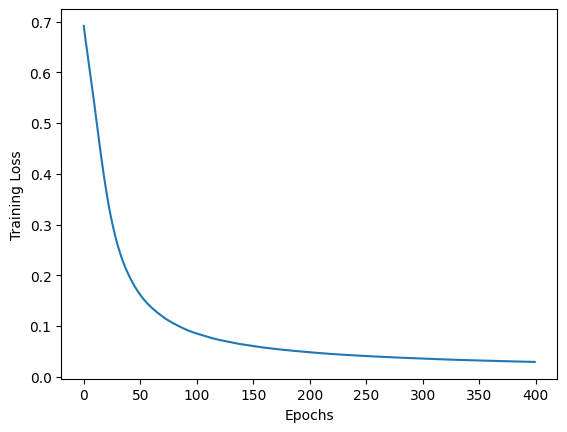

In [ ]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

### Question 1i: Evaluation on test data [5 pts]

Now we will be evaluating the accuracy we get from the trained model. We feed training data and test data to the forward model along with the trained parameters.

Note that, we need to covert the output probability of the forward pass to binary labels before evaluating accuracy. Since the model provides the posterior probability $p(y = 1 | x)$ in range [0,1]. We can binarize them using 0.5 as a theshold (i.e. if $y_i^{(2)}\geq 0.5$, $y_i^{(2)} \gets 1$ otherwise  $y_i^{(2)} \gets 0$).

In [ ]:
Y2_train, _ = forward(train_x, params)
Y_hat_train = (Y2_train >= 0.5).astype(int)
train_accuracy = np.mean(Y_hat_train == train_y)
print(f"Training accuracy: {train_accuracy:.4f}")

Y2_test, _ = forward(test_x, params)
Y_hat_test = (Y2_test >= 0.5).astype(int)
test_accuracy = np.mean(Y_hat_test == test_y)
print(f"Test accuracy: {test_accuracy:.4f}")

Training accuracy: 0.9930
Test accuracy: 0.9555


### Question 1j: Visualize some of the correct/misclassified images [5 pts]

Now we will look at some images from training and test sets that were misclassified.

Training set.
Pick 5 images from each class that are correcly and incorreclty classified.
True/False Positive/Negatives

Test set.
Pick 5 images from each class that are correcly and incorreclty classified.
True/False Positive/Negatives


In [ ]:
def plot_images(X, indices, title, predicted_label=None, true_label=None):
    plt.figure(figsize=(10, 2))
    for idx, i in enumerate(indices[:5]):
        plt.subplot(1, 5, idx + 1)
        img = X[:, i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        if predicted_label is not None and true_label is not None:
            plt.title(f"P:{predicted_label[i]} / T:{true_label[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

Training set examples for true/false positive/negative


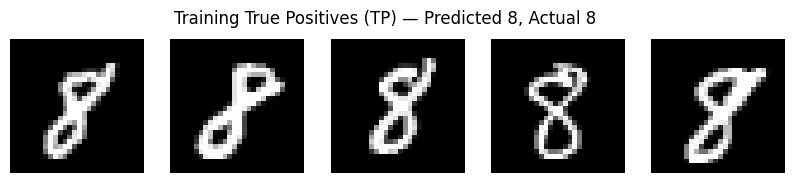

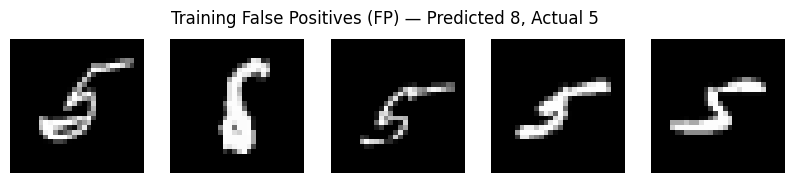

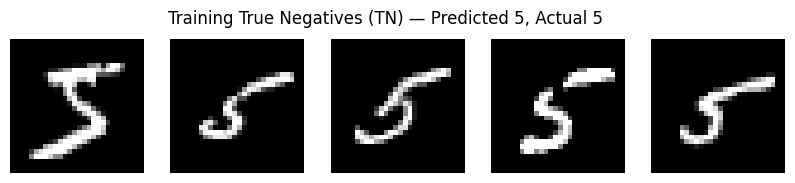

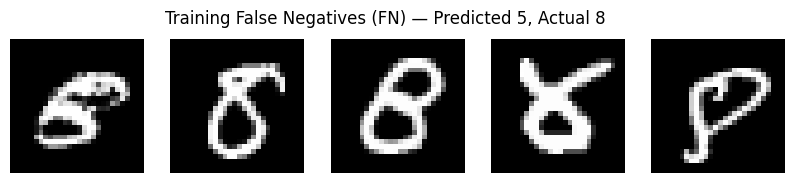

In [ ]:
# Train set
print("Training set examples for true/false positive/negative")
Y_hat, caches = forward(train_x, params)

train_y_predicted = (Y_hat >= 0.5).astype(int)

TP_train = np.where((train_y_predicted == 1) & (train_y == 1))[1]
FP_train = np.where((train_y_predicted == 1) & (train_y == 0))[1]
TN_train = np.where((train_y_predicted == 0) & (train_y == 0))[1]
FN_train = np.where((train_y_predicted == 0) & (train_y == 1))[1]

plot_images(train_x, TP_train, "Training True Positives (TP) — Predicted 8, Actual 8")
plot_images(train_x, FP_train, "Training False Positives (FP) — Predicted 8, Actual 5")
plot_images(train_x, TN_train, "Training True Negatives (TN) — Predicted 5, Actual 5")
plot_images(train_x, FN_train, "Training False Negatives (FN) — Predicted 5, Actual 8")


Test set examples for true/false positive/negative


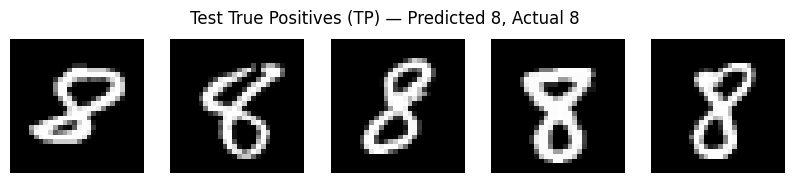

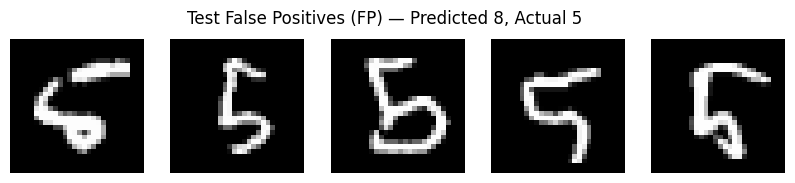

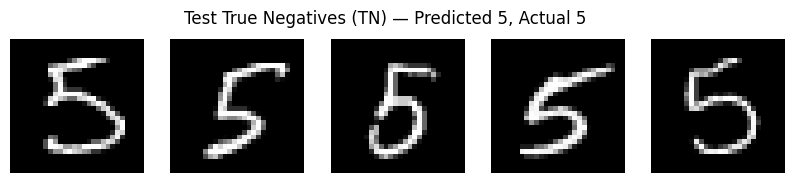

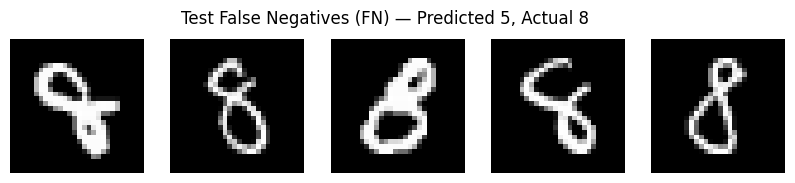

In [ ]:
# Test set
print("Test set examples for true/false positive/negative")
Y_hat, caches = forward(test_x, params)

test_y_predicted = (Y_hat >= 0.5).astype(int)

TP_test = np.where((test_y_predicted == 1) & (test_y == 1))[1]
FP_test = np.where((test_y_predicted == 1) & (test_y == 0))[1]
TN_test = np.where((test_y_predicted == 0) & (test_y == 0))[1]
FN_test = np.where((test_y_predicted == 0) & (test_y == 1))[1]

plot_images(test_x, TP_test, "Test True Positives (TP) — Predicted 8, Actual 8")
plot_images(test_x, FP_test, "Test False Positives (FP) — Predicted 8, Actual 5")
plot_images(test_x, TN_test, "Test True Negatives (TN) — Predicted 5, Actual 5")
plot_images(test_x, FN_test, "Test False Negatives (FN) — Predicted 5, Actual 8")



### Note about implementation

This is a note on two problems I have seen in the past and how they can be easily fixed.

1. Summation along different axes ?

2. Summation of gradients over samples ?




**1. Summation along different axes**

Suppose we want to compute `grad_b1` for which we need to sum (or average) `delta_1` over all the training samples.

We can do that as
```
# suppose delta_1 -- 256 x N array
# grad_b1 -- 256 x 1 array

grad_b1 = (1/N)*np.sum(delta_1, axis=1, keepdims=True)
```

The **WRONG** thing to do is
```
grad_b1 = np.sum(delta_1)
# This is WRONG. np.sum() computes sum of the entire array.
```


---


**2. Computing gradient for the entire loss function**

(this involves summation of N rank-one matrices in our notation.)




Suppose you have computed delta1, delta2 properly




Let's assume you computed
```
# delta2 is a 10 x 10000 array
# Y1 is a 256 x 10000 array
# N is 10000
# grad_W2 should be a 10 x 256 array
```



We can expand the formula for the gradient of the overall loss.

$$\nabla_{W^{(2)}} Loss = \frac{1}{N}\sum_i \nabla_{W^{(2)}} Loss_i, $$

where

$$\nabla_{W^{(2)}} Loss_i = \delta^{(2)} y^{(1)T}$$ is the gradient of the loss for $i$th training sample, where $\delta^{(2)}$ is a column of length 10 and $y^{(1)T}$ is a row of length 256, corresponding to $i$th training sample. Matrix product of column and row gives a a rank-1 matrix of size 10 x 256.




To compute the gradient of loss over all the training samples, we need to average the rank-1 matrices for all N training samples.


We can write the code for that as

```
# Sum gradient of loss for each sample
for i in range(N):
	grad_W2 += (1/N)*delta2[:,i,None].dot(Y1[:,i,None].T)

# OR we can compute grad_W2 without for loop as
grad_W2 = 1/N*np.dot(delta2,Y1.T)
```

To see why this is true, you can convince yourself that matrix product of an `M x N` matrix with an `N x K` matrix can be written as a summation of N `M x K` rank-one matricess.




Suppose

$A = [\mathbf{a}_1 ~ \cdots ~ \mathbf{a}_N] \text{ and } B  = \begin{bmatrix} \mathbf{b}_1^T \\ \vdots \\ \mathbf{b}_N^T \end{bmatrix},$

where $\mathbf{a}_i, \mathbf{b}_i$ are columns of length $M, K$, respectively.



We can write $AB$ as




$$AB = \sum_{i = 1}^N \mathbf{a}_i \mathbf{b}_i^T.$$


---



---

## <font color='red'> **Submission instructions** </font>
1. Follow these steps to download this Colab notebook and convert it to PDF. You can follow similar steps as [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) but convert to PDF (not HTML).
 - Download your notebook as `.ipynb` file. You can do it using only Google Colab. `File` -> `Download` -> `Download .ipynb`.
 - Reupload it so Colab can see it. Click on the `Files` icon on the far left to expand the side bar. You can directly drag the downloaded `.ipynb` file to the area. Or click `Upload to session storage` icon and then select & upload your `.ipynb` file.
 - Use the following commands to convert it to PDF.
 ```
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
!pip install pypandoc
!jupyter nbconvert --log-level CRITICAL --to pdf /path/to/Fall2025_HW4-Two-Layer-Network.ipynb
  ```
 - Your PDF file is ready. Click 3 dots and `Download`.

<font color='red'> **Note: Please follow these instructions to generate the PDF. DO NOT use any other method, such as `ctrl+p`.** </font>

2. Upload the PDF to Gradescope and **select** the correct pages for each question. Refer to the shared video or contact the TAs if you face any issues. **Important!**


3. Upload the `.ipynb` file to Gradescope. Make sure that both the **code** and the **PDF** are uploaded. **Important!**


Notice: In case of errors in conversion, please check your LaTeX and debug. In Markdown, when you write in LaTeX math mode, do not leave any leading and trailing whitespaces inside the dollar signs ($). For example, write `(dollarSign)\mathbf(dollarSign)(dollarSign)` instead of `(dollarSign)(space)\mathbf{w}(dollarSign)`. Otherwise, nbconvert will throw an error and the generated pdf will be incomplete.

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --log-level INFO --to pdf /content/Fall2025_HW4_Two_Layer_Network.ipynb # make sure the ipynb name is correct

[NbConvertApp] Converting notebook /content/Fall2025_HW4_Two_Layer_Network.ipynb to pdf
[NbConvertApp] Support files will be in Fall2025_HW4_Two_Layer_Network_files/
[NbConvertApp] Making directory ./Fall2025_HW4_Two_Layer_Network_files
[NbConvertApp] Writing 74555 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 223547 bytes to /content/Fall2025_HW4_Two_Layer_Network.pdf
